###  In this notebook , model testing is automated in for-loops,
### This notebook is created for optimization of model testing procedure

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange
from sklearn import linear_model

In [4]:
## Data loading procedure

In [3]:
X_2house = pd.read_csv('/wgdisk/ho0338/ek79/Tien/X_2house_v0.csv')
X_2house=X_2house.drop(columns=['Unnamed: 0'])
X_2house.index.rename('Order', inplace=True)

In [84]:
y_2house = -1*np.load('Data/Processed/y_2house.npy')

In [85]:
## check on the data dimensions
print('X_input:',X_2house.shape)
print('y_input:',y_2house.shape)

X_input: (4290985, 158)
y_input: (4290985,)


In [86]:
## setup train-test split
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_2house, y_2house, test_size=0.5, random_state=12)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2145492, 158)
(2145492,)
(2145493, 158)
(2145493,)


In [88]:
### setup model parameters
#mod_type = ['Lasso','Ridge']
mod_type = ['Lasso','Ridge']
fit_int, norm, copyX, max_itr, tolerance, solv, Precomp, pos, r_stat = False, False, True, None, 0.001, 'auto', False, False, 12
test_alph = [5.0,2.0,1.0,0.1]

In [89]:
# prepare the numpy array to store the model coefficients & intercepts
k = X_train.shape[1]
r_k = len(mod_type)*len(test_alph)
col_names =['model_type','alpha']
for i in range(k):
    str_name = 'coef_'+X_train.columns[i]
    col_names=col_names+[str(str_name)]   
col_names = col_names+['intercept','MSE_train','MSE_test','MSE_reduction_ratio']

In [90]:
#  initiate a new dataframe , empty to append
df= pd.DataFrame(columns = col_names)
df.head()

,model_type,alpha,coef_MS SubClass,coef_MS Zoning,coef_Lot Frontage,coef_Lot Area,coef_Street,coef_Alley,coef_Lot Shape,coef_Land Contour,coef_Utilities,coef_Lot Config,coef_Land Slope,coef_Neighborhood,coef_Condition 1,coef_Condition 2,coef_Bldg Type,coef_House Style,coef_Overall Qual,coef_Overall Cond,coef_Year Built,coef_Year Remod/Add,coef_Roof Style,coef_Roof Matl,coef_Exterior 1st,coef_Exterior 2nd,coef_Mas Vnr Type,coef_Mas Vnr Area,coef_Exter Qual,coef_Exter Cond,coef_Foundation,coef_Bsmt Qual,coef_Bsmt Cond,coef_Bsmt Exposure,coef_BsmtFin Type 1,coef_BsmtFin SF 1,coef_BsmtFin Type 2,coef_BsmtFin SF 2,coef_Bsmt Unf SF,coef_Total Bsmt SF,coef_Heating,coef_Heating QC,coef_Central Air,coef_Electrical,coef_1st Flr SF,coef_2nd Flr SF,coef_Low Qual Fin SF,coef_Gr Liv Area,coef_Bsmt Full Bath,coef_Bsmt Half Bath,coef_Full Bath,coef_Half Bath,coef_Bedroom AbvGr,coef_Kitchen AbvGr,coef_Kitchen Qual,coef_TotRms AbvGrd,coef_Functional,coef_Fireplaces,coef_Fireplace Qu,coef_Garage Type,coef_Garage Yr Blt,coef_Garage Finish,coef_Garage Cars,coef_Garage Area,coef_Garage Qual,coef_Garage Cond,coef_Paved Drive,coef_Wood Deck SF,coef_Open Porch SF,coef_Enclosed Porch,coef_3Ssn Porch,coef_Screen Porch,coef_Pool Area,coef_Pool QC,coef_Fence,coef_Misc Feature,coef_Misc Val,coef_Mo Sold,coef_Yr Sold,coef_Sale Type,coef_Sale Condition,coef_MS SubClass_2,coef_MS Zoning_2,coef_Lot Frontage_2,coef_Lot Area_2,coef_Street_2,coef_Alley_2,coef_Lot Shape_2,coef_Land Contour_2,coef_Utilities_2,coef_Lot Config_2,coef_Land Slope_2,coef_Neighborhood_2,coef_Condition 1_2,coef_Condition 2_2,coef_Bldg Type_2,coef_House Style_2,coef_Overall Qual_2,coef_Overall Cond_2,coef_Year Built_2,coef_Year Remod/Add_2,coef_Roof Style_2,coef_Roof Matl_2,coef_Exterior 1st_2,coef_Exterior 2nd_2,coef_Mas Vnr Type_2,coef_Mas Vnr Area_2,coef_Exter Qual_2,coef_Exter Cond_2,coef_Foundation_2,coef_Bsmt Qual_2,coef_Bsmt Cond_2,coef_Bsmt Exposure_2,coef_BsmtFin Type 1_2,coef_BsmtFin SF 1_2,coef_BsmtFin Type 2_2,coef_BsmtFin SF 2_2,coef_Bsmt Unf SF_2,coef_Total Bsmt SF_2,coef_Heating_2,coef_Heating QC_2,coef_Central Air_2,coef_Electrical_2,coef_1st Flr SF_2,coef_2nd Flr SF_2,coef_Low Qual Fin SF_2,coef_Gr Liv Area_2,coef_Bsmt Full Bath_2,coef_Bsmt Half Bath_2,coef_Full Bath_2,coef_Half Bath_2,coef_Bedroom AbvGr_2,coef_Kitchen AbvGr_2,coef_Kitchen Qual_2,coef_TotRms AbvGrd_2,coef_Functional_2,coef_Fireplaces_2,coef_Fireplace Qu_2,coef_Garage Type_2,coef_Garage Yr Blt_2,coef_Garage Finish_2,coef_Garage Cars_2,coef_Garage Area_2,coef_Garage Qual_2,coef_Garage Cond_2,coef_Paved Drive_2,coef_Wood Deck SF_2,coef_Open Porch SF_2,coef_Enclosed Porch_2,coef_3Ssn Porch_2,coef_Screen Porch_2,coef_Pool Area_2,coef_Pool QC_2,coef_Fence_2,coef_Misc Feature_2,coef_Misc Val_2,coef_Mo Sold_2,coef_Yr Sold_2,coef_Sale Type_2,coef_Sale Condition_2,intercept,MSE_train,MSE_test,MSE_reduction_ratio


In [91]:
pd.set_option('display.max_columns', None)

In [22]:
df.columns
len(tmp_row)

164

In [92]:
from sklearn import metrics
for test_type in tqdm(mod_type):
    print('model type: ',test_type)
    for alph in tqdm(test_alph):
        print('alpha is: ', alph)
        if test_type == 'Lasso': 
            model = linear_model.Lasso(alpha=alph, fit_intercept=fit_int, normalize=norm, precompute=Precomp, copy_X=copyX, max_iter=1000, random_state=r_stat, selection='cyclic')
        if test_type == 'Ridge': 
            model = linear_model.Ridge(alpha=alph, fit_intercept=fit_int, normalize=norm, copy_X= copyX, max_iter= max_itr, tol= tolerance, solver= solv, random_state=r_stat)
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        MSE_test= metrics.mean_squared_error(y_test, y_test_pred)
        MAE_test= metrics.mean_absolute_error(y_test, y_test_pred)
        MSE_train= metrics.mean_squared_error(y_train, y_train_pred)
        MAE_train= metrics.mean_absolute_error(y_train, y_train_pred)
        MSE_neg_ratio= (MSE_test-MSE_train)/MSE_train*100
        print('MSE score(testing):', MSE_test)
        print('MAE score(testing):', MAE_test)
        print('MSE score(train):', MSE_train)
        print('MAE score(train):', MAE_train)
        print('MSE reduction ratio:', MSE_neg_ratio)
        # save coefficients
        tmp_row=[test_type,alph]+list(model.coef_)+[model.intercept_]+[MSE_train, MSE_test, MSE_neg_ratio]
        df.loc[len(df)]=tmp_row




  0%|          | 0/2 [00:00<?, ?it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

model type:  Lasso
alpha is:  5.0


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



 25%|██▌       | 1/4 [10:34<31:44, 634.78s/it]

MSE score(testing): 1723975376.9
MAE score(testing): 27632.5096329
MSE score(train): 1716168182.37
MAE score(train): 27607.4638292
MSE reduction ratio: 0.454920129939
alpha is:  2.0





 50%|█████     | 2/4 [20:18<20:18, 609.25s/it]

MSE score(testing): 1723974337.36
MAE score(testing): 27637.2593482
MSE score(train): 1716164569.2
MAE score(train): 27612.1573607
MSE reduction ratio: 0.455071052378
alpha is:  1.0





 75%|███████▌  | 3/4 [28:49<09:36, 576.65s/it]

MSE score(testing): 1723980238.59
MAE score(testing): 27638.9150854
MSE score(train): 1716169682.58
MAE score(train): 27613.7977767
MSE reduction ratio: 0.455115603459
alpha is:  0.1





100%|██████████| 4/4 [37:22<00:00, 560.74s/it]




 50%|█████     | 1/2 [37:22<37:22, 2242.95s/it]


  0%|          | 0/4 [00:00<?, ?it/s]

MSE score(testing): 1723988682.34
MAE score(testing): 27640.5121801
MSE score(train): 1716177034.88
MAE score(train): 27615.3724892
MSE reduction ratio: 0.455177251595
model type:  Ridge
alpha is:  5.0





 25%|██▌       | 1/4 [00:03<00:09,  3.02s/it]

MSE score(testing): 1702334474.37
MAE score(testing): 27270.2582019
MSE score(train): 1694152207.24
MAE score(train): 27242.6479796
MSE reduction ratio: 0.482971193442
alpha is:  2.0





 50%|█████     | 2/4 [00:05<00:05,  2.89s/it]

MSE score(testing): 1702334611.15
MAE score(testing): 27270.271525
MSE score(train): 1694152204.36
MAE score(train): 27242.659889
MSE reduction ratio: 0.482979437475
alpha is:  1.0





 75%|███████▌  | 3/4 [00:08<00:02,  2.85s/it]

MSE score(testing): 1702334657.33
MAE score(testing): 27270.2759816
MSE score(train): 1694152203.95
MAE score(train): 27242.6638604
MSE reduction ratio: 0.482982187902
alpha is:  0.1


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.123693e-17
  overwrite_a=True).T



100%|██████████| 4/4 [00:11<00:00,  2.83s/it]




100%|██████████| 2/2 [37:34<00:00, 1127.14s/it]



MSE score(testing): 1702334699.15
MAE score(testing): 27270.2800063
MSE score(train): 1694152203.81
MAE score(train): 27242.6674363
MSE reduction ratio: 0.48298466433


class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)

In [93]:
df

,model_type,alpha,coef_MS SubClass,coef_MS Zoning,coef_Lot Frontage,coef_Lot Area,coef_Street,coef_Alley,coef_Lot Shape,coef_Land Contour,coef_Utilities,coef_Lot Config,coef_Land Slope,coef_Neighborhood,coef_Condition 1,coef_Condition 2,coef_Bldg Type,coef_House Style,coef_Overall Qual,coef_Overall Cond,coef_Year Built,coef_Year Remod/Add,coef_Roof Style,coef_Roof Matl,coef_Exterior 1st,coef_Exterior 2nd,coef_Mas Vnr Type,coef_Mas Vnr Area,coef_Exter Qual,coef_Exter Cond,coef_Foundation,coef_Bsmt Qual,coef_Bsmt Cond,coef_Bsmt Exposure,coef_BsmtFin Type 1,coef_BsmtFin SF 1,coef_BsmtFin Type 2,coef_BsmtFin SF 2,coef_Bsmt Unf SF,coef_Total Bsmt SF,coef_Heating,coef_Heating QC,coef_Central Air,coef_Electrical,coef_1st Flr SF,coef_2nd Flr SF,coef_Low Qual Fin SF,coef_Gr Liv Area,coef_Bsmt Full Bath,coef_Bsmt Half Bath,coef_Full Bath,coef_Half Bath,coef_Bedroom AbvGr,coef_Kitchen AbvGr,coef_Kitchen Qual,coef_TotRms AbvGrd,coef_Functional,coef_Fireplaces,coef_Fireplace Qu,coef_Garage Type,coef_Garage Yr Blt,coef_Garage Finish,coef_Garage Cars,coef_Garage Area,coef_Garage Qual,coef_Garage Cond,coef_Paved Drive,coef_Wood Deck SF,coef_Open Porch SF,coef_Enclosed Porch,coef_3Ssn Porch,coef_Screen Porch,coef_Pool Area,coef_Pool QC,coef_Fence,coef_Misc Feature,coef_Misc Val,coef_Mo Sold,coef_Yr Sold,coef_Sale Type,coef_Sale Condition,coef_MS SubClass_2,coef_MS Zoning_2,coef_Lot Frontage_2,coef_Lot Area_2,coef_Street_2,coef_Alley_2,coef_Lot Shape_2,coef_Land Contour_2,coef_Utilities_2,coef_Lot Config_2,coef_Land Slope_2,coef_Neighborhood_2,coef_Condition 1_2,coef_Condition 2_2,coef_Bldg Type_2,coef_House Style_2,coef_Overall Qual_2,coef_Overall Cond_2,coef_Year Built_2,coef_Year Remod/Add_2,coef_Roof Style_2,coef_Roof Matl_2,coef_Exterior 1st_2,coef_Exterior 2nd_2,coef_Mas Vnr Type_2,coef_Mas Vnr Area_2,coef_Exter Qual_2,coef_Exter Cond_2,coef_Foundation_2,coef_Bsmt Qual_2,coef_Bsmt Cond_2,coef_Bsmt Exposure_2,coef_BsmtFin Type 1_2,coef_BsmtFin SF 1_2,coef_BsmtFin Type 2_2,coef_BsmtFin SF 2_2,coef_Bsmt Unf SF_2,coef_Total Bsmt SF_2,coef_Heating_2,coef_Heating QC_2,coef_Central Air_2,coef_Electrical_2,coef_1st Flr SF_2,coef_2nd Flr SF_2,coef_Low Qual Fin SF_2,coef_Gr Liv Area_2,coef_Bsmt Full Bath_2,coef_Bsmt Half Bath_2,coef_Full Bath_2,coef_Half Bath_2,coef_Bedroom AbvGr_2,coef_Kitchen AbvGr_2,coef_Kitchen Qual_2,coef_TotRms AbvGrd_2,coef_Functional_2,coef_Fireplaces_2,coef_Fireplace Qu_2,coef_Garage Type_2,coef_Garage Yr Blt_2,coef_Garage Finish_2,coef_Garage Cars_2,coef_Garage Area_2,coef_Garage Qual_2,coef_Garage Cond_2,coef_Paved Drive_2,coef_Wood Deck SF_2,coef_Open Porch SF_2,coef_Enclosed Porch_2,coef_3Ssn Porch_2,coef_Screen Porch_2,coef_Pool Area_2,coef_Pool QC_2,coef_Fence_2,coef_Misc Feature_2,coef_Misc Val_2,coef_Mo Sold_2,coef_Yr Sold_2,coef_Sale Type_2,coef_Sale Condition_2,intercept,MSE_train,MSE_test,MSE_reduction_ratio
0,Lasso,5.0,129.096329,3381.508762,-33.897681,-0.378656,-12006.857528,-1773.737877,427.939799,-1435.067699,-2419.185652,-248.571051,4499.015420,-161.171232,18.985918,-3167.925479,620.618564,9824.430515,-11565.960015,-4161.712532,37.635419,6.422364,-1654.237535,193.337284,459.228837,-15.479760,-4735.840039,-43.303614,-12656.960710,1057.105255,-4225.384087,-9706.655054,10779.045244,-2370.358729,-513.666464,-29.977300,74.637165,-23.166834,-14.979953,2.175342,2523.033815,-2389.133569,651.138267,1208.386859,-48.727911,-59.085258,-31.115817,8.184609,-3326.348761,3506.024700,-5161.737942,-3722.501662,5167.529966,15591.490263,-8980.644870,-2872.014362,-2049.255462,-2545.047516,-373.903891,-936.849904,98.764782,-2183.022033,-9739.363433,-11.871922,0.277890,2633.112666,-1426.190660,-13.605374,9.174842,1.557694,19.517561,-44.566957,250.554522,-21594.047695,288.426621,-4138.765362,5.344538,111.437712,7.372428,-725.096981,2022.575834,-157.666615,-1699.348512,6.084111,0.261714,4740.083131,3292.251646,-1322.071808,1436.230435,1600.961662,488.588394,-7538.234085,319.477633,1095.788040,-3876.287975,258.523584,-14519.922763,1

In [76]:
# save the coefficients to a csv

In [94]:
df.to_csv('LR_models_hyperparam_saveout.csv')

In [131]:
# Compare prediction and the calculated y_predict from coeficients
def cal_pred(X_input,coefs,intcpt):
    """ X_input is a dataframe input with only attributes used in model fit """
    import numpy as np
    import pandas as pd
    from tqdm import tqdm
    nrows = len(X_input)
    b = np.array(coefs)
    y_pred = np.zeros(nrows)
    for i in tqdm(range(nrows)):
        x=np.array(X_input.iloc[i])
        y_pred[i]=intcpt+np.multiply(x,b).sum()
    return y_pred    

In [132]:
cal_y_pred = cal_pred(X_test,model.coef_,model.intercept_)

In [133]:
print(cal_y_pred.shape)
print(y_test_pred.shape)

(2145493,)
(2145493,)


In [47]:
import matplotlib.pyplot as plt
plt.scatter(cal_y_pred,y_test_pred)
plt.show()

NameError: name 'cal_y_pred' is not defined

In [39]:
# reorder the coeffcients and plot them
forpltcoef = df.iloc[:,2:160]
newcolorder = []
half = X_train.columns[0:79]

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [40]:
for i in range(len(half)):
    newcolorder= newcolorder+['coef_'+half[i]]
    newcolorder= newcolorder+['coef_'+half[i]+'_2']

In [43]:
forpltcoef = forpltcoef[newcolorder]  ## reordering the coefficient columns (to be easier to compare)

In [45]:
forpltcoef.head()

,coef_MS SubClass,coef_MS SubClass_2,coef_MS Zoning,coef_MS Zoning_2,coef_Lot Frontage,coef_Lot Frontage_2,coef_Lot Area,coef_Lot Area_2,coef_Street,coef_Street_2,...,coef_Misc Val,coef_Misc Val_2,coef_Mo Sold,coef_Mo Sold_2,coef_Yr Sold,coef_Yr Sold_2,coef_Sale Type,coef_Sale Type_2,coef_Sale Condition,coef_Sale Condition_2
0,-129.096329,157.666615,-3381.508762,1699.348512,33.897681,-6.084111,0.378656,-0.261714,12006.857528,-4740.083131,...,-5.344538,12.033208,-111.437712,35.443705,-7.372428,9.383066,725.096981,-476.490795,-2022.575834,3387.200112
1,-128.442279,157.486136,-3370.127547,1692.464663,34.011989,-6.203303,0.378325,-0.261526,12846.062426,-5577.485467,...,-5.362516,12.047360,-110.772565,36.803899,-7.236981,9.275880,723.811548,-476.185840,-2037.018052,3389.340575
2,-128.226871,157.427195,-3366.289761,1690.141978,34.050367,-6.243422,0.378213,-0.261464,13126.531123,-5856.636911,...,-5.368529,12.052074,-110.544305,37.256330,-7.191596,9.240041,723.363932,-476.072162,-2041.875991,3390.076541
3,-128.046352,157.375725,-3362.490533,1688.118805,34.085953,-6.279122,0.378104,-0.261406,13379.083225,-6107.141690,...,-5.373993,12.056325,-110.368505,37.661250,-7.151035,9.207685,722.834260,-475.968669,-2046.708034,3390.744467
4,-118.618713,155.082586,-2330.225184,1386.035234,33.053368,-5.394985,0.394281,-0.269994,9621.503720,-3133.574468,...,-5.457178,12.357206,-251.206730,48.205308,-1626.714520,1525.800994,782.142040,-524.394567,-1172.573496,2805.037891


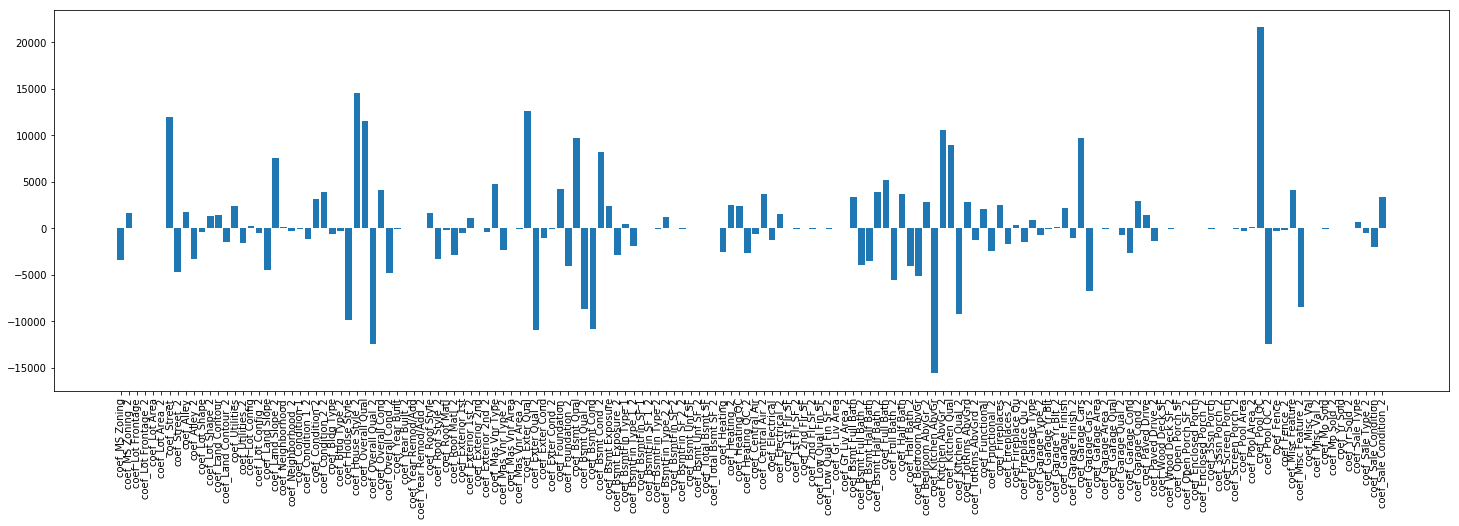

In [50]:
## draw a bar graph to observe behavior of the coefficients, hopefully they are very symmetry by half that the "_2"s are behaving just the same as the frist half
ss = forpltcoef.iloc[0]
fig = plt.figure(figsize=(25,7))
plt.bar(forpltcoef.columns[2:160],ss[2:160])
plt.xticks(rotation=90)
plt.show()

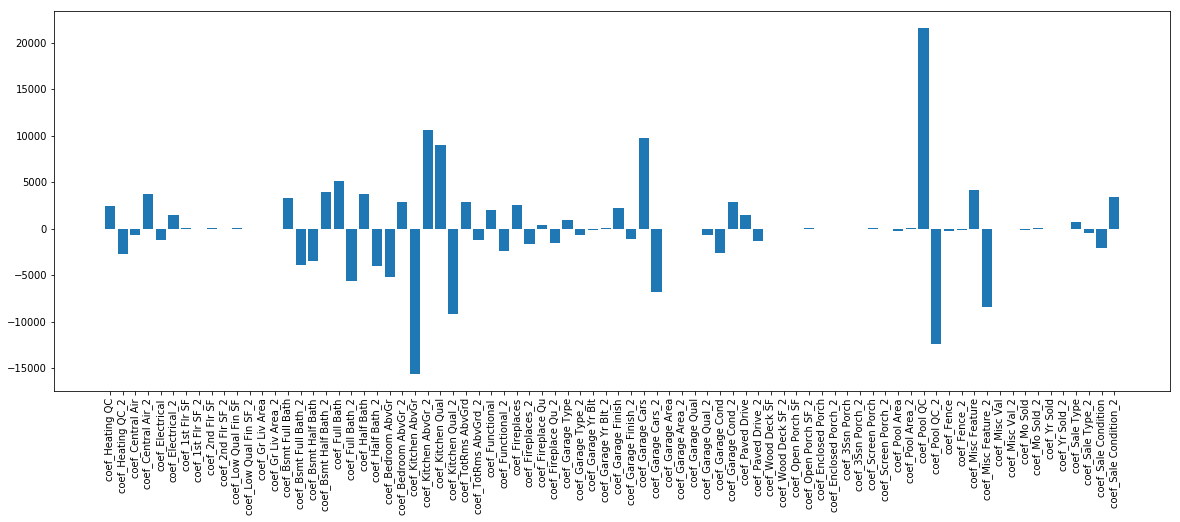

In [52]:
ss = forpltcoef.iloc[0]
fig = plt.figure(figsize=(20,7))
plt.bar(forpltcoef.columns[78:158],ss[78:158])
plt.xticks(rotation=90)
plt.show()

In [57]:
print('r2 score(testing):', metrics.r2_score(y_test, y_test_pred))

r2 score(testing): 0.866675051825


In [58]:
model02 = linear_model.LinearRegression(fit_intercept=False)

In [59]:
model02.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [61]:
y_test_pred_0 = model02.predict(X_test)
print('MSE score(testing):',metrics.mean_squared_error(y_test, y_test_pred_0))

MSE score(testing): 1702408282.86


In [75]:
df_reg= pd.DataFrame(columns = X_train.columns)
print(len(X_train.columns))
print(len(model02.coef_))
df_reg.loc[0]= list(model02.coef_)


158
158


In [80]:
df_reg.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,MS SubClass_2,MS Zoning_2,Lot Frontage_2,Lot Area_2,Street_2,Alley_2,Lot Shape_2,Land Contour_2,Utilities_2,Lot Config_2,Land Slope_2,Neighborhood_2,Condition 1_2,Condition 2_2,Bldg Type_2,House Style_2,Overall Qual_2,Overall Cond_2,Year Built_2,Year Remod/Add_2,Roof Style_2,Roof Matl_2,Exterior 1st_2,Exterior 2nd_2,Mas Vnr Type_2,Mas Vnr Area_2,Exter Qual_2,Exter Cond_2,Foundation_2,Bsmt Qual_2,Bsmt Cond_2,Bsmt Exposure_2,BsmtFin Type 1_2,BsmtFin SF 1_2,BsmtFin Type 2_2,BsmtFin SF 2_2,Bsmt Unf SF_2,Total Bsmt SF_2,Heating_2,Heating QC_2,Central Air_2,Electrical_2,1st Flr SF_2,2nd Flr SF_2,Low Qual Fin SF_2,Gr Liv Area_2,Bsmt Full Bath_2,Bsmt Half Bath_2,Full Bath_2,Half Bath_2,Bedroom AbvGr_2,Kitchen AbvGr_2,Kitchen Qual_2,TotRms AbvGrd_2,Functional_2,Fireplaces_2,Fireplace Qu_2,Garage Type_2,Garage Yr Blt_2,Garage Finish_2,Garage Cars_2,Garage Area_2,Garage Qual_2,Garage Cond_2,Paved Drive_2,Wood Deck SF_2,Open Porch SF_2,Enclosed Porch_2,3Ssn Porch_2,Screen Porch_2,Pool Area_2,Pool QC_2,Fence_2,Misc Feature_2,Misc Val_2,Mo Sold_2,Yr Sold_2,Sale Type_2,Sale Condition_2
0,-118.689162,-2341.220397,32.698079,0.389214,9529.969432,665.971558,-280.828368,897.703424,20807.000202,117.815395,-4270.270328,201.607867,-422.644588,3022.386661,-1301.06039,-6954.553941,10979.409739,5406.271248,241.461167,-9.425779,2059.484565,-93.189053,-334.754105,-51.80054,4980.431936,42.445617,11856.300506,-1231.829509,1582.072199,7687.854626,-9308.986509,2176.451421,251.97341,6.442263e+12,-138.136106,6.442263e+12,6.442263e+12,-6.442263e+12,-1971.498525,1862.212491,-3094.920515,-1968.70626,-5.475592e+12,-5.475592e+12,-5.475592e+12,5.475592e+12,3815.892964,-2909.861753,2497.08202,1220.289771,-5569.902843,-15202.084709,8549.327016,3129.082557,2015.282165,3210.355069,369.146837,1367.339759,-41.802991,1499.229032,8850.782558,8.991572,-704.834775,-2074.296017,-603.346327,11.17505,-7.98941,14.159824,-14.833475,51.404188,-251.574845,20207.989944,-341.672714,5217.528515,-5.455946,-251.121166,-1626.598397,781.988118,-1172.924695,155.087844,1386.562477,-5.401443,-0.27015,-3133.267116,-2361.394112,1203.995262,-1122.260763,-22086.187432,-469.503857,7688.398732,-336.646673,-859.382828,3994.983855,125.65312,12915.01012,-12120.872803,-5439.978382,-112.062939,-22.715812,-3475.685534,-3108.384169,1122.294839,-412.453171,-2511.533187,-31.143908,-10357.32619,-354.159338,-2323.74854,-7577.612149,7643.352242,-2759.69706,-1711.979857,-1.410143e+12,1118.271542,-1.410143e+12,-1.410143e+12,1.410143e+12,2039.002403,-2443.459254,5059.46862,2373.137598,2.576100e+12,2.576100e+12,2.576100e+12,-2.576100e+12,-3863.509351,3840.827481,-3811.605147,-2270.178674,2915.617643,10111.685672,-8518.815112,-1262.870298,-2441.60913,-2198.145654,-1499.422928,-919.591167,44.406012,-674.33401,-6394.054811,-17.44573,-224.409308,2830.43482,-388.288312,-15.770848,28.259743,-8.900642,-14.334046,-51.465121,102.757544,-11967.119151,-79.015718,-9480.837569,12.357276,48.134161,1525.746862,-524.253397,2804.669454


In [188]:
test_alph = [1.0,0.1,0.01,0.001]

In [189]:
from sklearn import metrics
for test_type in tqdm(mod_type):
    print('model type: ',test_type)
    for alph in test_alph:
        print('alpha is: ', alph)
        if test_type == 'Lasso': 
            model = linear_model.Lasso(alpha=alph, fit_intercept=fit_int, normalize=norm, precompute=Precomp, copy_X=copyX, max_iter=1000, random_state=r_stat, selection='cyclic')
        if test_type == 'Ridge': 
            model = linear_model.Ridge(alpha=alph, fit_intercept=fit_int, normalize=norm, copy_X= copyX, max_iter= max_itr, tol= tolerance, solver= solv, random_state=r_stat)
        model.fit(X_train,y_train)
        # save coefficients
        tmp_row=[test_type,alph]+list(model.coef_)+[model.intercept_]
        df.loc[len(df)]=tmp_row
        y_test_pred = model.predict(X_test)

        print('MSE score(testing):',metrics.mean_squared_error(y_test, y_test_pred))
        print('MAE score(testing):',metrics.mean_absolute_error(y_test, y_test_pred))



  0%|          | 0/2 [00:00<?, ?it/s]

model type:  Lasso
alpha is:  1.0


KeyboardInterrupt: 

In [160]:
df.tail(8)

,model type,alpha,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,MS SubClass_2,MS Zoning_2,Lot Frontage_2,Lot Area_2,Street_2,Alley_2,Lot Shape_2,Land Contour_2,Utilities_2,Lot Config_2,Land Slope_2,Neighborhood_2,Condition 1_2,Condition 2_2,Bldg Type_2,House Style_2,Overall Qual_2,Overall Cond_2,Year Built_2,Year Remod/Add_2,Roof Style_2,Roof Matl_2,Exterior 1st_2,Exterior 2nd_2,Mas Vnr Type_2,Mas Vnr Area_2,Exter Qual_2,Exter Cond_2,Foundation_2,Bsmt Qual_2,Bsmt Cond_2,Bsmt Exposure_2,BsmtFin Type 1_2,BsmtFin SF 1_2,BsmtFin Type 2_2,BsmtFin SF 2_2,Bsmt Unf SF_2,Total Bsmt SF_2,Heating_2,Heating QC_2,Central Air_2,Electrical_2,1st Flr SF_2,2nd Flr SF_2,Low Qual Fin SF_2,Gr Liv Area_2,Bsmt Full Bath_2,Bsmt Half Bath_2,Full Bath_2,Half Bath_2,Bedroom AbvGr_2,Kitchen AbvGr_2,Kitchen Qual_2,TotRms AbvGrd_2,Functional_2,Fireplaces_2,Fireplace Qu_2,Garage Type_2,Garage Yr Blt_2,Garage Finish_2,Garage Cars_2,Garage Area_2,Garage Qual_2,Garage Cond_2,Paved Drive_2,Wood Deck SF_2,Open Porch SF_2,Enclosed Porch_2,3Ssn Porch_2,Screen Porch_2,Pool Area_2,Pool QC_2,Fence_2,Misc Feature_2,Misc Val_2,Mo Sold_2,Yr Sold_2,Sale Type_2,Sale Condition_2,intercept
8,Lasso,1.000,-128.226871,-3366.289761,34.050367,0.378213,13126.531123,1847.422765,-427.182280,1460.753826,2107.371370,247.212305,-4688.606351,161.552111,-21.196089,3214.200303,-635.219377,-9994.579291,11547.080212,4184.377224,-37.520826,-6.418330,1662.483556,-222.095931,-459.965602,17.430634,4734.193275,43.257155,12654.064793,-1093.672114,4219.875929,9718.370684,-10818.511130,2368.855082,513.095812,30.012259,-81.700098,23.279479,15.047358,-2.194460,-2663.702824,2383.295418,-808.481666,-1242.203457,48.644229,59.131100,31.173981,-8.197445,3346.891123,-3595.410660,5214.904531,3770.095595,-5179.664088,-15828.954718,8981.921526,2901.680598,2061.929911,2594.160151,362.217054,941.704969,-98.426341,2178.848140,9782.367679,11.802277,-0.000000,-2647.001759,1445.091366,13.562899,-9.240577,-1.508954,-19.524327,44.502258,-253.069576,21869.192704,-293.139395,4318.731731,-5.368529,-110.544305,-7.191596,723.363932,-2041.875991,157.427195,1690.141978,-6.243422,-0.261464,-5856.636911,-3358.437250,1323.815683,-1448.006370,-1333.201264,-491.561376,7672.801080,-320.019577,-1098.508393,4021.938129,-267.010941,14702.144043,-12434.646496,-4845.884795,30.788683,2.184059,-3311.165079,-2906.836072,1146.925460,-446.430148,-2344.037615,-30.829536,-10956.738719,-120.253407,-4070.129476,-8666.776390,8259.180809,-2870.042066,-1846.972168,-13.567704,1239.207084,-16.977817,-6.815574,0.532448,2607.770805,-2687.489795,3874.048166,1550.701978,-54.615855,-68.090150,-36.884009,9.634148,-3938.031046,3970.806965,-5624.339918,-4080.245520,2858.488385,10849.343176,-9195.072004,-1288.358322,-2426.061449,-1684.363146,-1505.384823,-672.011339,99.654093,-1083.588499,-6836.543353,-19.421742,-805.345145,3042.064529,-1370.313897,-16.515219,28.804497,-0.657439,-13.419188,-46.270697,104.358752,-12594.579629,-154.631947,-8664.919261,12.052074,37.256330,9.240041,-476.072162,3390.076541,0.0
9,Lasso,0.100,-128.046352,-3362.490533,34.085953,0.378104,13379.083225,1863.453787,-

In [162]:
#  initiate a new dataframe , empty to append
df= pd.DataFrame(columns = col_names)
df.head()

,model_type,alpha,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,coef_10,coef_11,coef_12,coef_13,coef_14,coef_15,coef_16,coef_17,coef_18,coef_19,coef_20,coef_21,coef_22,coef_23,coef_24,coef_25,coef_26,coef_27,coef_28,coef_29,coef_30,coef_31,coef_32,coef_33,coef_34,coef_35,coef_36,coef_37,coef_38,coef_39,coef_40,coef_41,coef_42,coef_43,coef_44,coef_45,coef_46,coef_47,coef_48,coef_49,coef_50,coef_51,coef_52,coef_53,coef_54,coef_55,coef_56,coef_57,coef_58,coef_59,coef_60,coef_61,coef_62,coef_63,coef_64,coef_65,coef_66,coef_67,coef_68,coef_69,coef_70,coef_71,coef_72,coef_73,coef_74,coef_75,coef_76,coef_77,coef_78,coef_79,coef_80,coef_81,coef_82,coef_83,coef_84,coef_85,coef_86,coef_87,coef_88,coef_89,coef_90,coef_91,coef_92,coef_93,coef_94,coef_95,coef_96,coef_97,coef_98,coef_99,coef_100,coef_101,coef_102,coef_103,coef_104,coef_105,coef_106,coef_107,coef_108,coef_109,coef_110,coef_111,coef_112,coef_113,coef_114,coef_115,coef_116,coef_117,coef_118,coef_119,coef_120,coef_121,coef_122,coef_123,coef_124,coef_125,coef_126,coef_127,coef_128,coef_129,coef_130,coef_131,coef_132,coef_133,coef_134,coef_135,coef_136,coef_137,coef_138,coef_139,coef_140,coef_141,coef_142,coef_143,coef_144,coef_145,coef_146,coef_147,coef_148,coef_149,coef_150,coef_151,coef_152,coef_153,coef_154,coef_155,coef_156,coef_157,coef_158,intercept


In [165]:
### setup model parameters
#mod_type = ['Lasso','Ridge']
mod_type = ['Lasso','Ridge']
fit_int, norm, copyX, max_itr, tolerance, solv, Precomp, pos, r_stat = False, True, True, None, 0.001, 'auto', False, False, 12
# Turn on normalization
test_alph = [5.0,2.0,1.0,0.1,0.01,0.001]

In [166]:
from sklearn import metrics
for test_type in tqdm(mod_type):
    print('model type: ',test_type)
    for alph in test_alph:
        print('alpha is: ', alph)
        if test_type == 'Lasso': 
            model = linear_model.Lasso(alpha=alph, fit_intercept=fit_int, normalize=norm, precompute=Precomp, copy_X=copyX, max_iter=1000, random_state=r_stat, selection='cyclic')
        if test_type == 'Ridge': 
            model = linear_model.Ridge(alpha=alph, fit_intercept=fit_int, normalize=norm, copy_X= copyX, max_iter= max_itr, tol= tolerance, solver= solv, random_state=r_stat)
        model.fit(X_train,y_train)
        # save coefficients
        tmp_row=[test_type,alph]+list(model.coef_)+[model.intercept_]
        df.loc[len(df)]=tmp_row
        y_test_pred = model.predict(X_test)

        print('MSE score(testing):',metrics.mean_squared_error(y_test, y_test_pred))
        print('MAE score(testing):',metrics.mean_absolute_error(y_test, y_test_pred))



  0%|          | 0/2 [00:00<?, ?it/s]

model type:  Lasso
alpha is:  5.0


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


MSE score(testing): 1723975376.9
MAE score(testing): 27632.5096329
alpha is:  2.0
MSE score(testing): 1723974337.36
MAE score(testing): 27637.2593482
alpha is:  1.0
MSE score(testing): 1723980238.59
MAE score(testing): 27638.9150854
alpha is:  0.1
MSE score(testing): 1723988682.34
MAE score(testing): 27640.5121801
alpha is:  0.01
MSE score(testing): 1723989684.17
MAE score(testing): 27640.6756101
alpha is:  0.001




 50%|█████     | 1/2 [51:27<51:27, 3087.97s/it]

MSE score(testing): 1723989785.77
MAE score(testing): 27640.6919651
model type:  Ridge
alpha is:  5.0
MSE score(testing): 1702334474.37
MAE score(testing): 27270.2582019
alpha is:  2.0
MSE score(testing): 1702334611.15
MAE score(testing): 27270.271525
alpha is:  1.0
MSE score(testing): 1702334657.33
MAE score(testing): 27270.2759816
alpha is:  0.1


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.123693e-17
  overwrite_a=True).T


MSE score(testing): 1702334699.15
MAE score(testing): 27270.2800063
alpha is:  0.01


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.387266e-18
  overwrite_a=True).T


MSE score(testing): 1702334703.34
MAE score(testing): 27270.2804088
alpha is:  0.001


/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.373155e-19
  overwrite_a=True).T


100%|██████████| 2/2 [52:18<00:00, 1569.49s/it]



MSE score(testing): 1702334703.76
MAE score(testing): 27270.2804491


In [167]:
df

,model_type,alpha,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,coef_10,coef_11,coef_12,coef_13,coef_14,coef_15,coef_16,coef_17,coef_18,coef_19,coef_20,coef_21,coef_22,coef_23,coef_24,coef_25,coef_26,coef_27,coef_28,coef_29,coef_30,coef_31,coef_32,coef_33,coef_34,coef_35,coef_36,coef_37,coef_38,coef_39,coef_40,coef_41,coef_42,coef_43,coef_44,coef_45,coef_46,coef_47,coef_48,coef_49,coef_50,coef_51,coef_52,coef_53,coef_54,coef_55,coef_56,coef_57,coef_58,coef_59,coef_60,coef_61,coef_62,coef_63,coef_64,coef_65,coef_66,coef_67,coef_68,coef_69,coef_70,coef_71,coef_72,coef_73,coef_74,coef_75,coef_76,coef_77,coef_78,coef_79,coef_80,coef_81,coef_82,coef_83,coef_84,coef_85,coef_86,coef_87,coef_88,coef_89,coef_90,coef_91,coef_92,coef_93,coef_94,coef_95,coef_96,coef_97,coef_98,coef_99,coef_100,coef_101,coef_102,coef_103,coef_104,coef_105,coef_106,coef_107,coef_108,coef_109,coef_110,coef_111,coef_112,coef_113,coef_114,coef_115,coef_116,coef_117,coef_118,coef_119,coef_120,coef_121,coef_122,coef_123,coef_124,coef_125,coef_126,coef_127,coef_128,coef_129,coef_130,coef_131,coef_132,coef_133,coef_134,coef_135,coef_136,coef_137,coef_138,coef_139,coef_140,coef_141,coef_142,coef_143,coef_144,coef_145,coef_146,coef_147,coef_148,coef_149,coef_150,coef_151,coef_152,coef_153,coef_154,coef_155,coef_156,coef_157,coef_158,intercept
0,Lasso,5.000,-129.096329,-3381.508762,33.897681,0.378656,12006.857528,1773.737877,-427.939799,1435.067699,2419.185652,248.571051,-4499.015420,161.171232,-18.985918,3167.925479,-620.618564,-9824.430515,11565.960015,4161.712532,-37.635419,-6.422364,1654.237535,-193.337284,-459.228837,15.479760,4735.840039,43.303614,12656.960710,-1057.105255,4225.384087,9706.655054,-10779.045244,2370.358729,513.666464,29.977300,-74.637165,23.166834,14.979953,-2.175342,-2523.033815,2389.133569,-651.138267,-1208.386859,48.727911,59.085258,31.115817,-8.184609,3326.348761,-3506.024700,5161.737942,3722.501662,-5167.529966,-15591.490263,8980.644870,2872.014362,2049.255462,2545.047516,373.903891,936.849904,-98.764782,2183.022033,9739.363433,11.871922,-0.277890,-2633.112666,1426.190660,13.605374,-9.174842,-1.557694,-19.517561,44.566957,-250.554522,21594.047695,-288.426621,4138.765362,-5.344538,-111.437712,-7.372428,725.096981,-2022.575834,157.666615,1699.348512,-6.084111,-0.261714,-4740.083131,-3292.251646,1322.071808,-1436.230435,-1600.961662,-488.588394,7538.234085,-319.477633,-1095.788040,3876.287975,-258.523584,14519.922763,-12454.519638,-4835.576095,31.013613,2.203978,-3303.130317,-2902.215729,1144.507619,-444.255567,-2344.856688,-30.871403,-10947.969884,-65.617740,-4076.352414,-8664.203657,8222.309001,-2871.093350,-1848.250419,-13.480150,1224.858398,-16.829471,-6.696366,0.509561,2471.597870,-2694.874758,3711.946110,1515.618241,-54.755889,-68.029208,-36.923199,9.619379,-3914.234892,3899.595066,-5575.865870,-4021.882943,2848.298068,10588.232972,-9201.971490,-1254.686259,-2418.433564,-1629.982523,-1517.529337,-665.512671,99.858815,-1088.150523,-6786.334729,-19.510528,-678.376160,2904.725924,-1352.986253,-16.528609,28.759308,-0.563511,-13.555538,-46.324356,102.696685,-12385.630952,-153.353397,-8454.194363,12.033208,35.443705,9.383066,-476.490795,3387.200112,0.0
1,Lasso,2.000,-128.442279,-3370.127547,34.011989,0.378325,12846.062426,1829.010908,-427.384688,1454.280056,2190.627004,247.558295,-4641.022143,161.458676,-20.631128,3202.199788,-631.592344,-9952.653397,11551.581829,4178.499804,-37.557892,-6.419119,1660.417400,-214.895574,-459.777859,16.939582,4734.598607,43.268879,12655.097434,-1084.262445,4221.329556,9715.419331,-10808.647395,2369.236754,513.262114,30.003864,-79.930328,23.251682,15.030923,-2.189740,-2628.517300,2384.782237,-768.826518,-1233.959573,48.664823,59.120160,31.159627,-8.194308,3341.682728,-3573.013140,5201.639807,3758.250612,-5176.660232,-15769.929096,8981.647662,2894.295325,2058.769574,2581.883620,365.149837,940.482919,-98.511768,2179.898128,9771.669668,11.819746,-0.000000,-2643.576437,1440.438434,13.573714,-9.223859